# Signals and Systems
## Lecture 07
## 这一节主要讲了连续情况下周期函数的傅里叶级数展开。

对于周期函数$X(t)$，$X(t)=X(t+T_0)$，$\omega_0=2\pi/T_0$，可以写成如下的展开形式：<br>
$X(t)=\sum^{+\infty}_{k=-\infty}a_k e^{jk\omega_0t}$.<br>
而对于$e^{jm\omega_0t}$有：<br>
$e^{jm\omega_0t}=\begin{cases}
T_0, \quad m=0,\\
0, \quad m\neq0.
\end{cases}
$
<br>故在展开式两边乘上$e^{-jn\omega_0t}$再在一个周期内积分得：<br>
$\int_{T_0}X(t)e^{-jn\omega_0t}dt=a_nT_0$. 得$a_n=\frac{1}{T_0}\int_{T_0}X(t)e^{-jn\omega_0t}dt$.

### 下面是一个例子
用的是一个周期为1，幅值为1的方波（奇函数）。<br>
用公式计算得到的系数，偶数项的都为0，奇数项正负是对称的（故只留正数项）。<br>
第n项为$\frac{4}{n\pi}{\rm sin}(n\omega_0t)$.<br>
代码实现如下：

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_figure(x, y_1, y_2):
    """Plot a figure."""
    _, ax = plt.subplots()
    ax.plot(x, y_1, label='y_1', linewidth=1)
    ax.plot(x, y_2, label='y_2', linewidth=1)
    # Set chart title and label axes.
    #ax.set_title("Epsilon-Episodes", fontsize=24)
    ax.set_xlabel("X", fontsize=14)
    ax.set_ylabel("Y", fontsize=14)
    # Set size of tick labels.
    ax.tick_params(axis='both', labelsize=14)
    plt.legend()
    plt.show()

def square_wave(x, period):
    """Square wave function."""
    temp = math.floor(2*x/period)
    val = 0
    if temp%2==0:
        val = 1
    else:
        val = -1
    return val

def n_fourier_series(n, x, length, period):
    """Fourier series of the square wave function."""
    k = [2*i+1 for i in range(n)]
    print(k)
    const = 2*math.pi/period
    y = np.zeros(length)
    for i in k:
        for j in range(length):
            y[j] = y[j] + 4/(i*math.pi)*math.sin(i*const*x[j])
    return y

这里用多少项去逼近是可以调的，在下面的代码y_2 = n_fourier_series(30, x_np, length, period)中可修改。

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


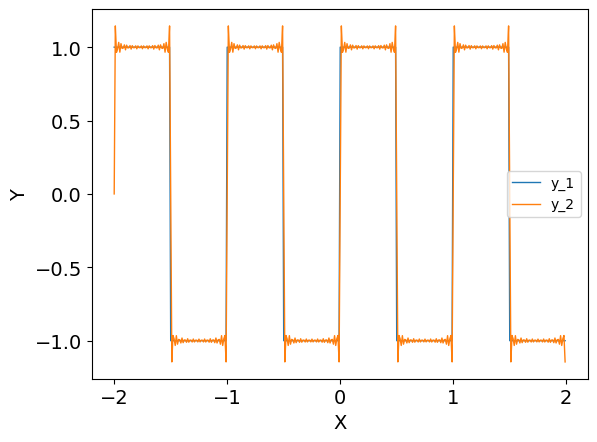

In [8]:
x = [0.01*i for i in range(-200,200)]
length = len(x)
x_np = np.array(x) # Convert it to numpy array.
period = 1
y_1 = np.zeros(length)
for i in range(length):
    y_1[i] = square_wave(x[i], period)
y_2 = n_fourier_series(30, x_np, length, period)
plot_figure(x, y_1, y_2)